## Caracterização meteorológica da área de estudo

Autora: Kezia Bernarda de Oliveira

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## 1. Analise da condição Meteorológica de superfície

Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR.


In [3]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
file_to_open = 'metar_2023.csv'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Kezia\Documents\GitHub\ENS7173_202401
C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie
['metar_2023.csv']


In [5]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [6]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


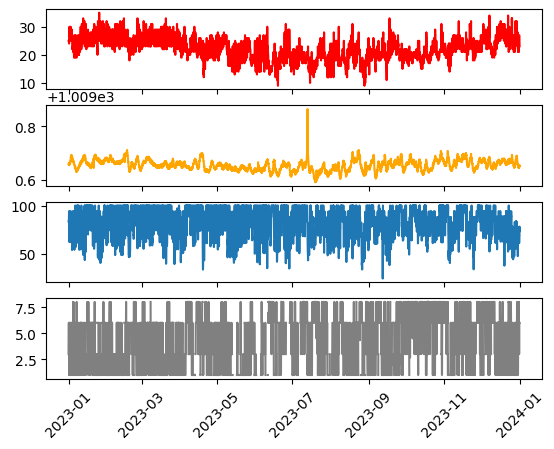

In [7]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da cco é:1009.6967607391396


<Figure size 800x600 with 0 Axes>

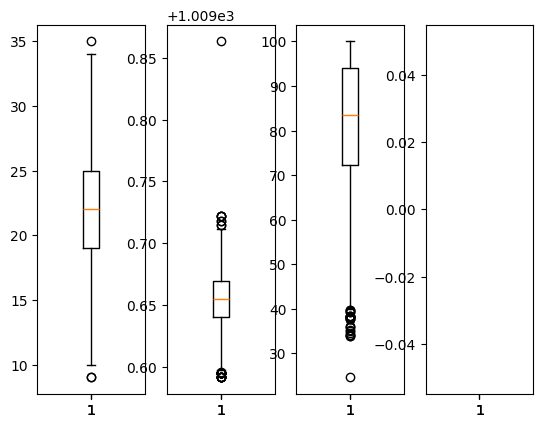

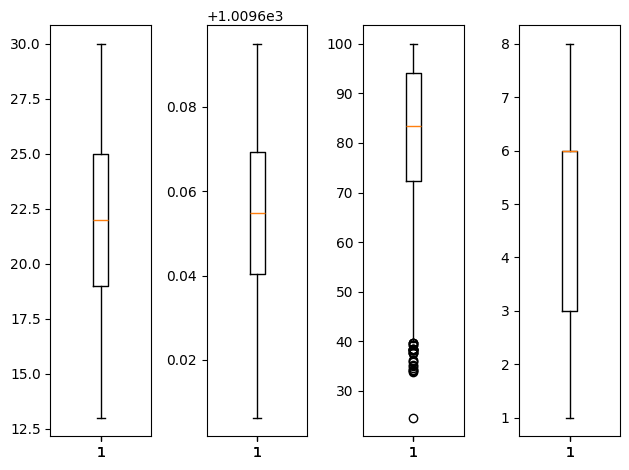

In [15]:
# Fazendo boxplot das variáveis
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do arquivo CSV
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Criar uma figura e eixos
plt.figure(figsize=(8, 6))

# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:'+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:'+str(p99))
#print(metSuperficie['temp']<temp99)
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:'+str(p99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & 
              (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & 
              (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Verificar se o diretório de saída existe, caso contrário, criar
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar as figuras
fig_path = os.path.join(output_dir, 'boxplots_meteorologicos.png')
plt.savefig(fig_path)

# Exibir os boxplots
plt.show()

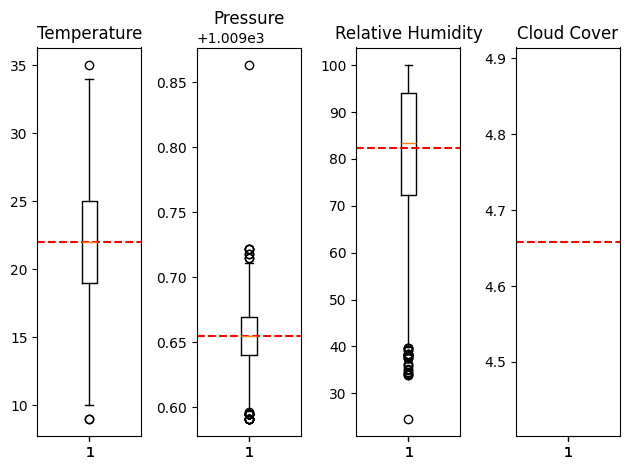

In [64]:
# Fazendo boxplot das variáveis ( temperatura , pressão , umidade relativa , cobertura de nuvens)

# Configurar as subplots
fig, ax = plt.subplots(1, 4, sharex=True)

# Plotar boxplot de temperatura
ax[0].boxplot(metSuperficie['temp'])
ax[0].set_title('Temperature')
ax[0].axhline(y=np.mean(metSuperficie['temp']), color='r', linestyle='--')  # Adiciona linha horizontal na altura da média

# Plotar boxplot de pressão
ax[1].boxplot(metSuperficie['p'])
ax[1].set_title('Pressure')
ax[1].axhline(y=np.mean(metSuperficie['p']), color='r', linestyle='--')  # Adiciona linha horizontal na altura da média

# Plotar boxplot de umidade relativa
ax[2].boxplot(metSuperficie['relh'])
ax[2].set_title('Relative Humidity')
ax[2].axhline(y=np.mean(metSuperficie['relh']), color='r', linestyle='--')  # Adiciona linha horizontal na altura da média

# Plotar boxplot de cobertura de nuvens
ax[3].boxplot(metSuperficie['cco'])
ax[3].set_title('Cloud Cover')
ax[3].axhline(y=np.mean(metSuperficie['cco']), color='r', linestyle='--')  # Adiciona linha horizontal na altura da média


# Ajustar layout
plt.tight_layout()

# Diretório para salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'boxplots.png')
plt.savefig(fig_path)

# Exibir a figura
plt.show()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\1478889480.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\1478889480.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\1478889480.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\1478889480.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\1478889480.py:30: FutureWarning: 'M' is deprecated and will be removed in a futu

<Figure size 800x600 with 0 Axes>

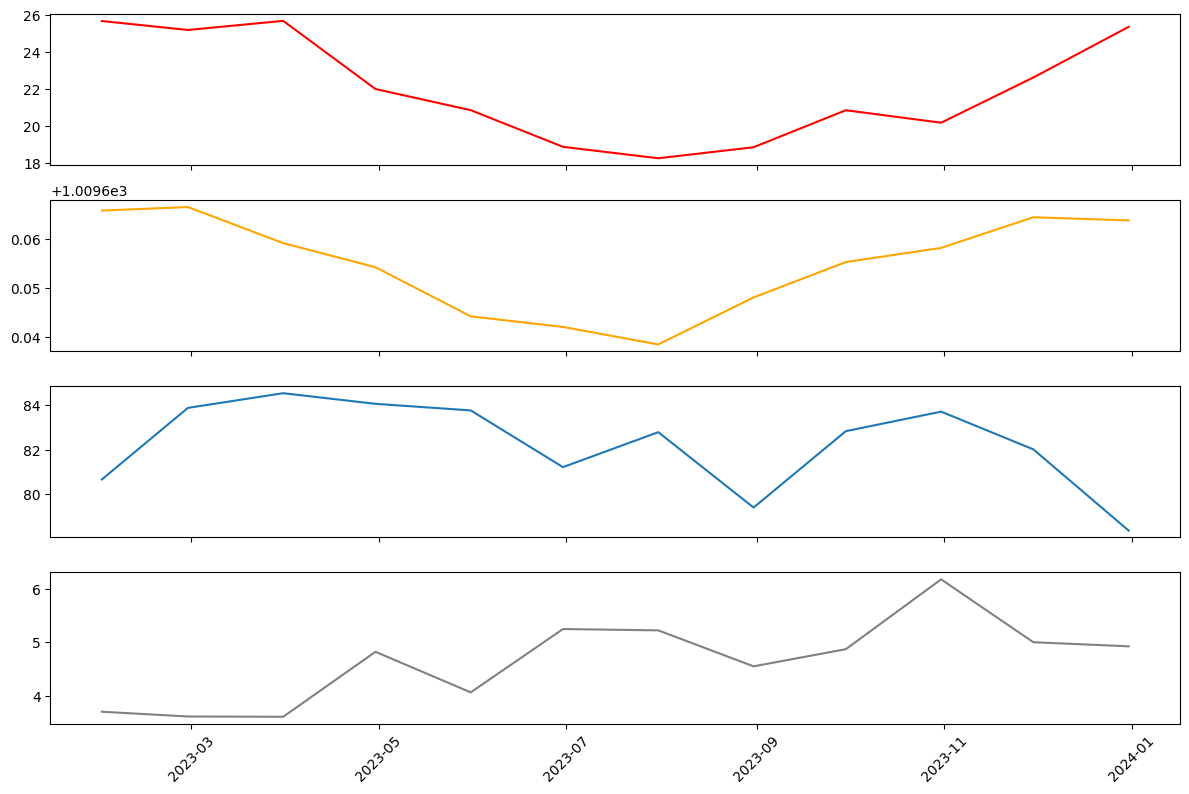

            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

In [69]:
# Estatísticas dos dados

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Converter a data e hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir o índice como datetime
metSuperficie.set_index('datetime', inplace=True)

# Verificar o tipo de índice
print(type(metSuperficie.index))

# Calcular estatísticas mensais
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Criar uma figura e eixos
plt.figure(figsize=(8, 6))

#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True, figsize=(12, 8))
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Criar o DataFrame estatisticas
estatisticas = pd.DataFrame({'coluna1': [1, 2, 3], 'coluna2': [4, 5, 6]})

# Salvar a figura
plt.savefig('media_mensal.png')

# Mostrar a figura
plt.show()

# Verificar as estatísticas mínimas mensais
print(min_mensal)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\2339619752.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\2339619752.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\2339619752.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\2339619752.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\Kezia\AppData\Local\Temp\ipykernel_19120\2339619752.py:30: FutureWarning: 'M' is deprecated and will be removed in a futu

            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

<Figure size 1200x800 with 0 Axes>

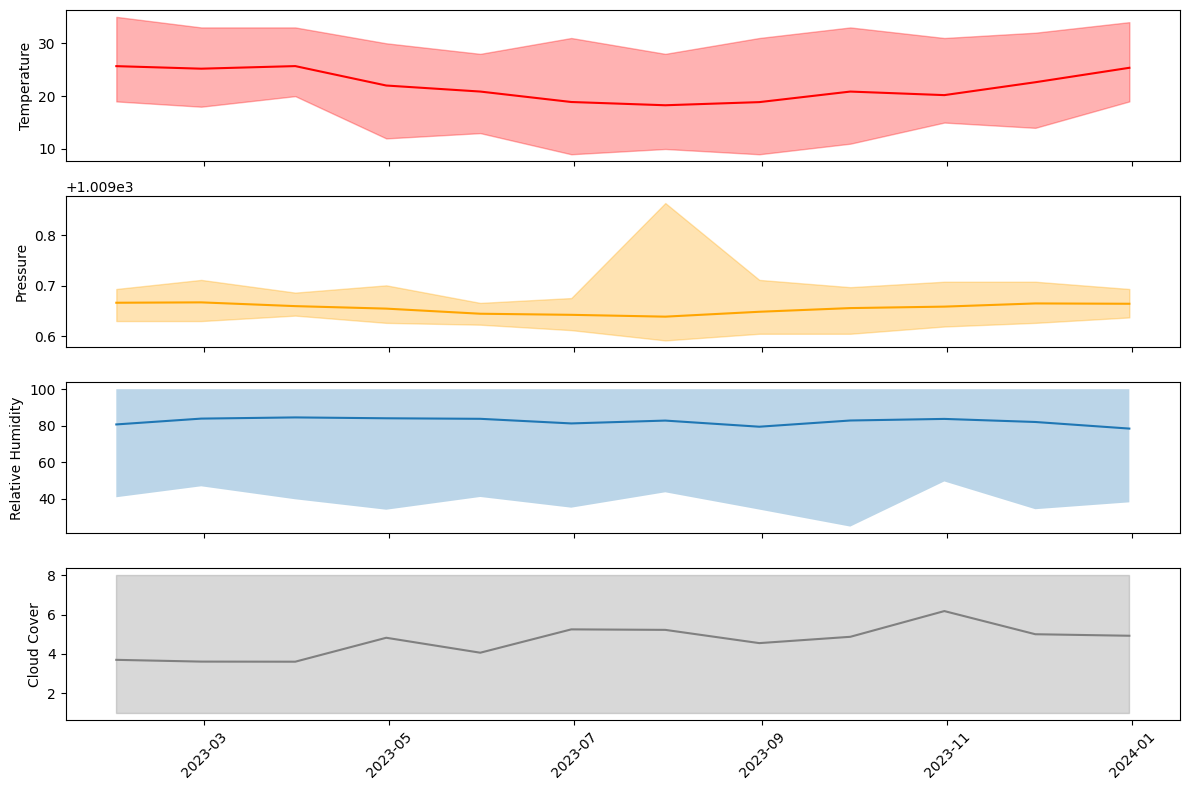

In [81]:
# Estatísticas dos dados

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Converter a data e hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir o índice como datetime
metSuperficie.set_index('datetime', inplace=True)

# Verificar o tipo de índice
print(type(metSuperficie.index))

# Calcular estatísticas mensais
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Criar uma figura e eixos
plt.figure(figsize=(12, 8))

#metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True, figsize=(12, 8))
ax[0].plot(media_mensal.index,media_mensal['temp'],color='red')
ax[0].set_ylabel('Temperature')
ax[1].plot(media_mensal.index,media_mensal['p'],color='orange')
ax[1].set_ylabel('Pressure')
ax[2].plot(media_mensal.index,media_mensal['relh'])
ax[2].set_ylabel('Relative Humidity')
ax[3].plot(media_mensal.index,media_mensal['cco'],color='gray')
ax[3].set_ylabel('Cloud Cover')
ax[3].tick_params(axis='x', rotation=45)

# Adicionar sombra em torno das médias mensais
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='red', alpha=0.3)
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.3)
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], alpha=0.3)
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='gray', alpha=0.3)
plt.tight_layout()

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Criar o DataFrame estatisticas
estatisticas = pd.DataFrame({'coluna1': [1, 2, 3], 'coluna2': [4, 5, 6]})

# Salvar a figura
plt.savefig('media_mensal.png')


# Verificar as estatísticas mínimas mensais
print(min_mensal)


<Figure size 1000x1000 with 0 Axes>

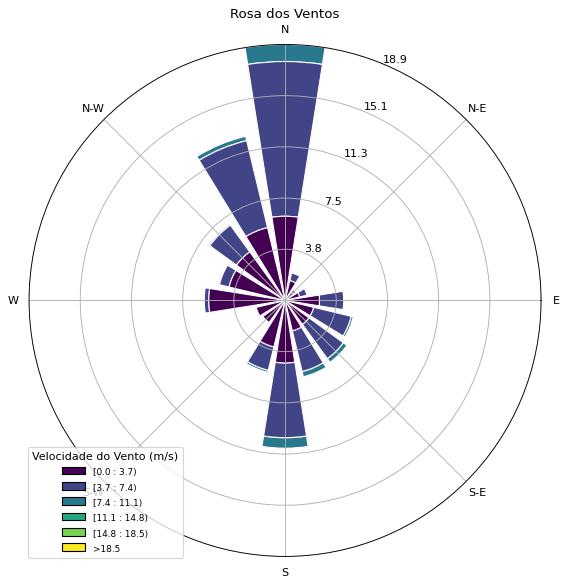

In [74]:
# Criando minha rosa dos ventos
from windrose import WindroseAxes
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
file_path = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Converter a data e hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir o índice como datetime
metSuperficie.set_index('datetime', inplace=True)

# Verificar se as colunas de direção do vento (wd) e velocidade do vento (ws) estão presentes
if 'wd' not in metSuperficie.columns or 'ws' not in metSuperficie.columns:
    raise ValueError("O DataFrame deve conter colunas 'wd' (direção do vento) e 'ws' (velocidade do vento).")

# Criar a rosa dos ventos
fig = plt.figure(figsize=(10, 10))
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor='white')

# Adicionar a legenda
ax.set_legend(title="Velocidade do Vento (m/s)")
plt.title('Rosa dos Ventos')

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

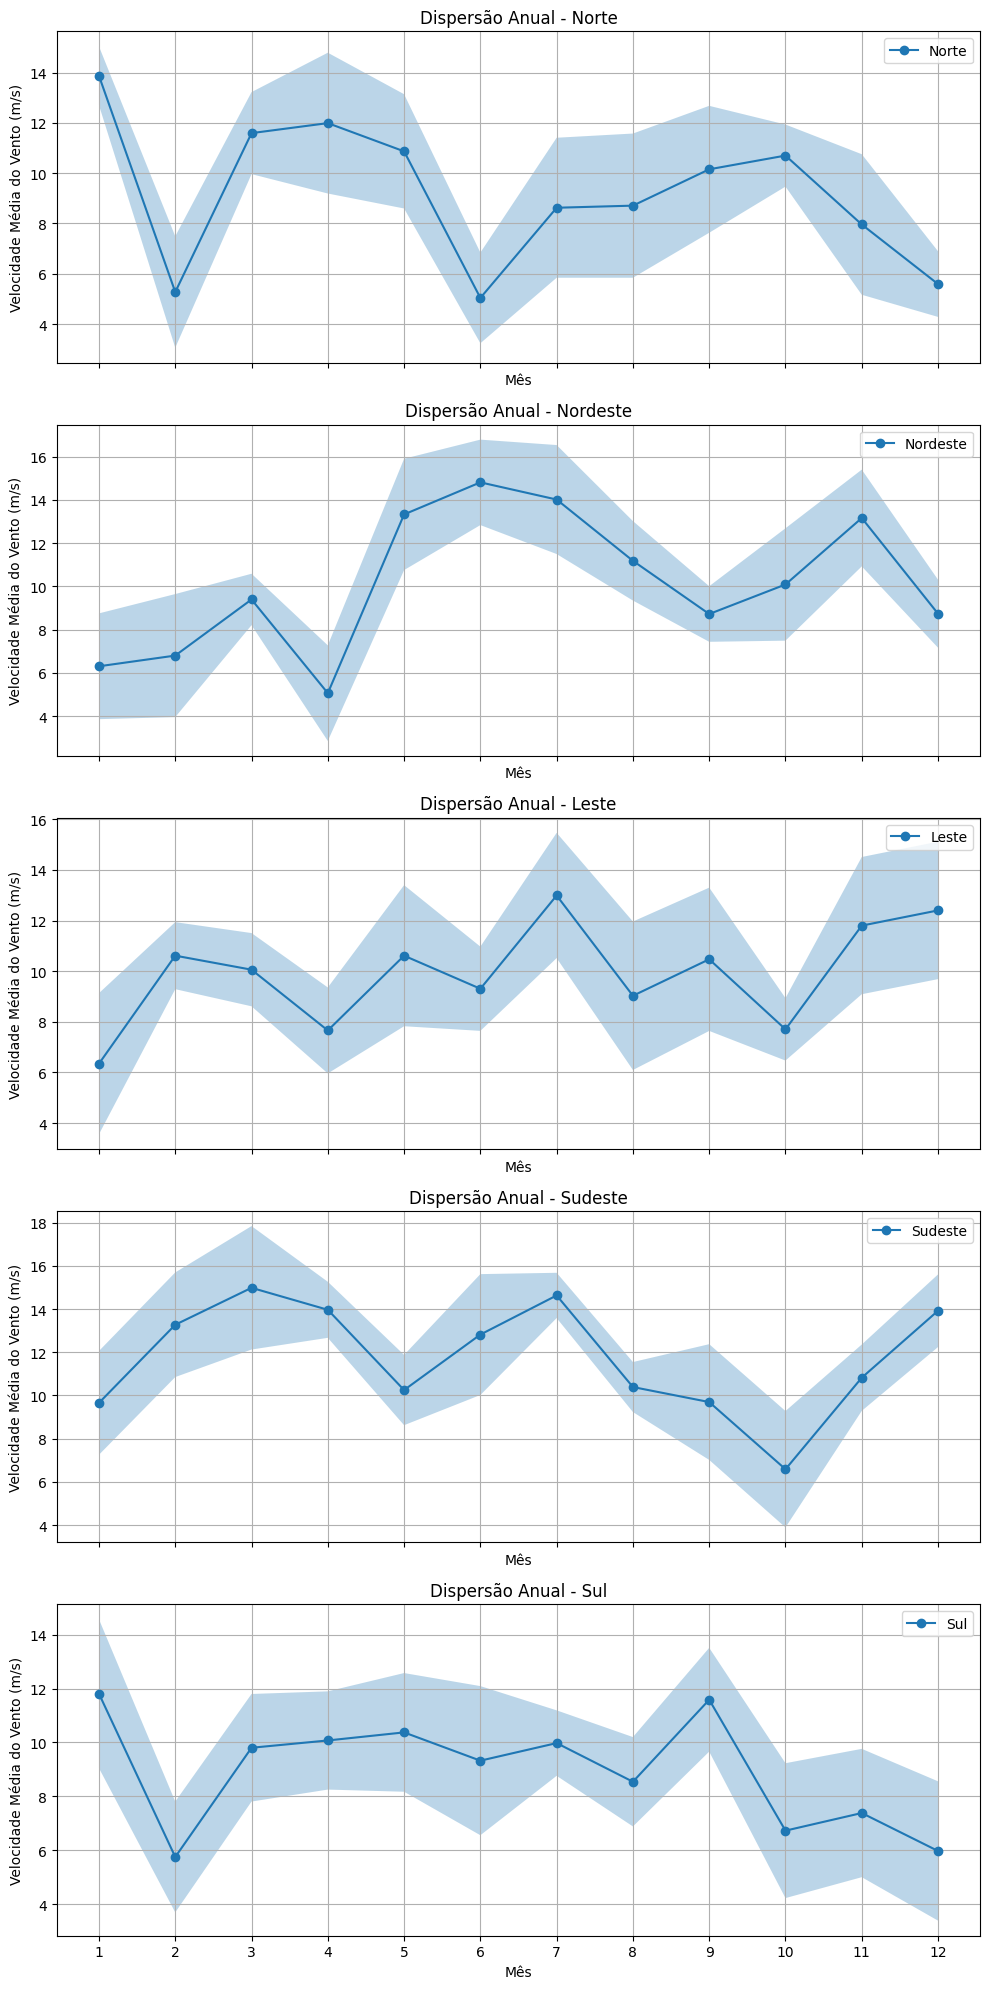

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados aleatórios para ilustrar a análise
quadrantes = ['Norte', 'Nordeste', 'Leste', 'Sudeste', 'Sul']
meses = range(1, 13)

# Criar DataFrame para armazenar os dados
dados = {
    'Quadrante': [],
    'Mês': [],
    'Velocidade Média': [],
    'Desvio Padrão': []
}

for quad in quadrantes:
    for mes in meses:
        # Gerar velocidade média aleatória para o quadrante e mês específicos
        velocidade_media = np.random.uniform(5, 15)
        # Gerar desvio padrão aleatório para o quadrante e mês específicos
        desvio_padrao = np.random.uniform(1, 3)
        dados['Quadrante'].append(quad)
        dados['Mês'].append(mes)
        dados['Velocidade Média'].append(velocidade_media)
        dados['Desvio Padrão'].append(desvio_padrao)

df = pd.DataFrame(dados)

# Plotar dispersões anuais para cada quadrante com fill_between
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, quad in enumerate(quadrantes):
    df_quad = df[df['Quadrante'] == quad]
    meses = df_quad['Mês']
    velocidade_media = df_quad['Velocidade Média']
    desvio_padrao = df_quad['Desvio Padrão']
    
    # Plotar dispersões anuais
    axes[i].plot(meses, velocidade_media, '-o', label=quad)
    axes[i].fill_between(meses, velocidade_media - desvio_padrao, velocidade_media + desvio_padrao, alpha=0.3)
    axes[i].set_title(f'Dispersão Anual - {quad}')
    axes[i].set_xlabel('Mês')
    axes[i].set_ylabel('Velocidade Média do Vento (m/s)')
    axes[i].set_xticks(range(1, 13))
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

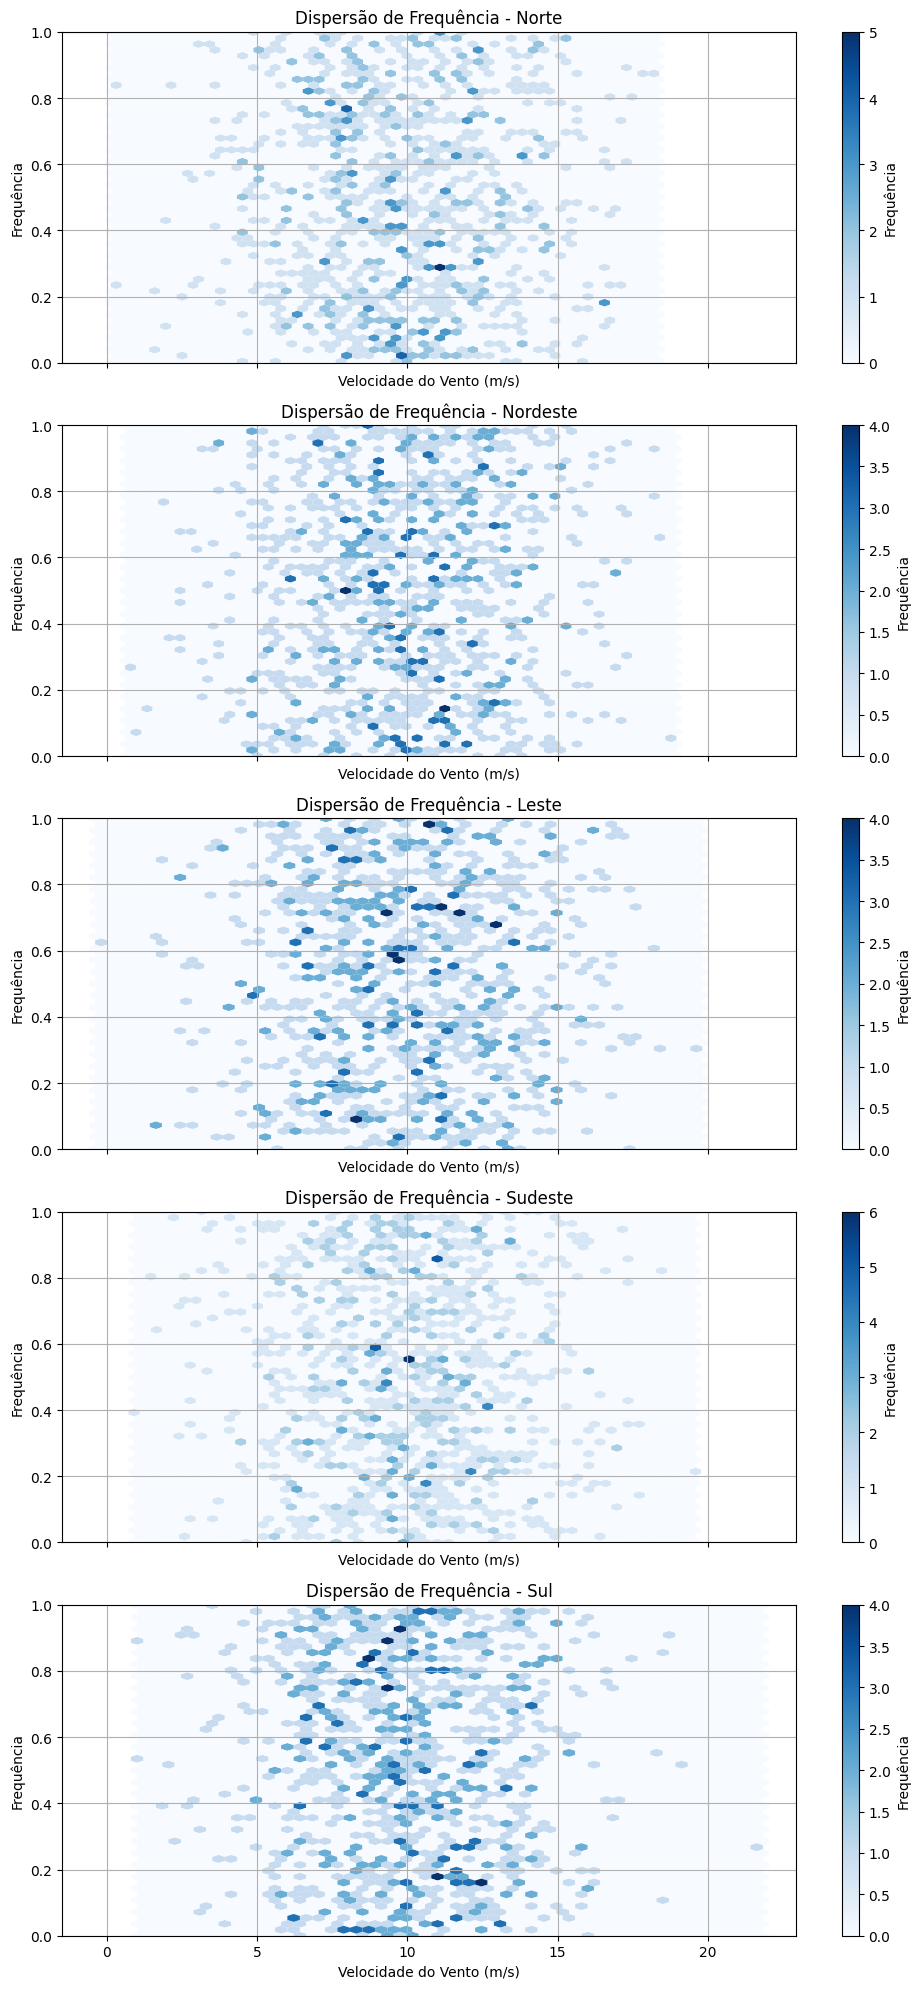

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados fictícios
quadrantes = ['Norte', 'Nordeste', 'Leste', 'Sudeste', 'Sul']
velocidades = np.random.normal(10, 3, size=(1000, len(quadrantes)))

# Criar DataFrame
df = pd.DataFrame(velocidades, columns=quadrantes)

# Plotar hexbin plot para cada quadrante
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

for i, quad in enumerate(quadrantes):
    # Plotar hexbin plot
    hb = axes[i].hexbin(df[quad], np.random.rand(len(df)), gridsize=50, cmap='Blues', edgecolors='none')
    axes[i].set_title(f'Dispersão de Frequência - {quad}')
    axes[i].set_xlabel('Velocidade do Vento (m/s)')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True)
    axes[i].set_ylim(0, 1)  # Limitar o eixo y entre 0 e 1
    
    # Adicionar barra de cores
    cb = fig.colorbar(hb, ax=axes[i])
    cb.set_label('Frequência')

plt.tight_layout()
plt.show()

## Análise upperair/sondagem/perfil da atmosfera

Nesta parte analisou-se os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [5]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

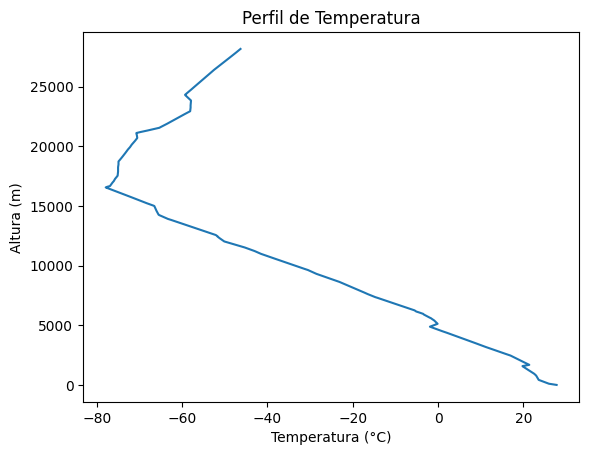

In [13]:
# Fazendo figura do perfil de temperatura

fig,ax = plt.subplots()
ax.plot(df['temperature'],df['height'])

# Adicionar a legenda
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Altura (m)')
ax.set_title('Perfil de Temperatura')

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

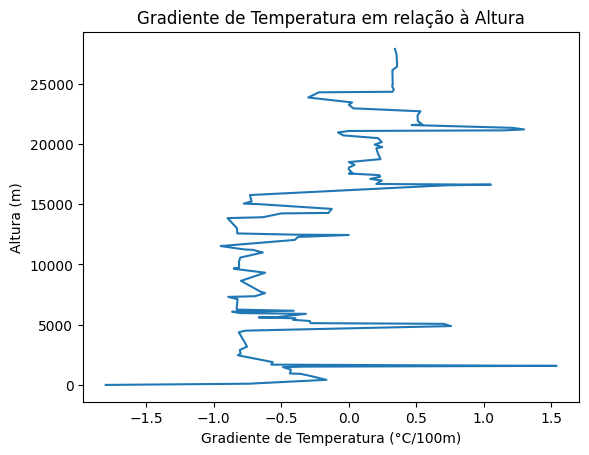

In [14]:
# Calcular gradiente de temperatura x altura

import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# Local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

# Plot do gradiente de temperatura em relação à altura
deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ= (deltaT/deltaZ)*100 # a cada 100 m
print(dTdZ)

fig,ax = plt.subplots()
ax.plot(dTdZ,df['height'][:-1])

# Adicionar a legenda
ax.set_xlabel('Gradiente de Temperatura (°C/100m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Gradiente de Temperatura em relação à Altura')

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

## 2.  Análise do perfil de temperatura

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica.

Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


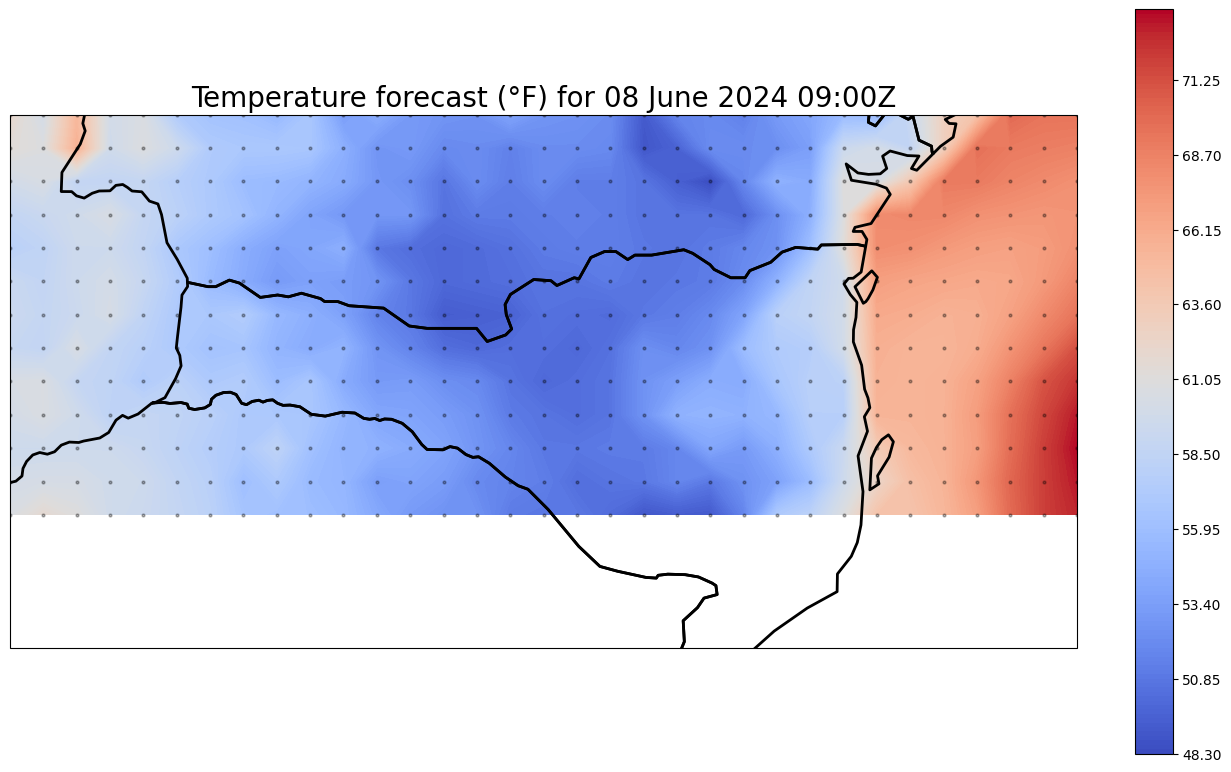

In [14]:
#Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o paco Siphon do Python

from datetime import datetime

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
from siphon.catalog import TDSCatalog


from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -29, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

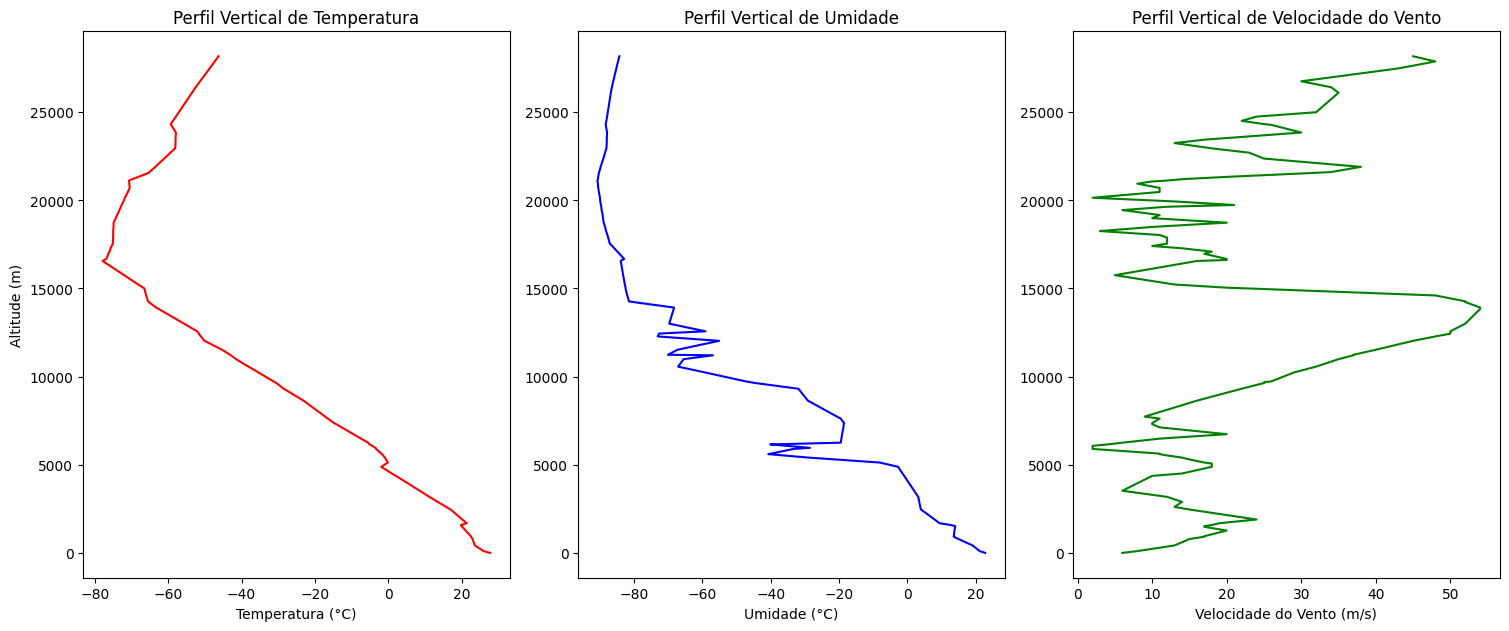

In [19]:
# Construção de Perfis Verticais de Temperatura, Umidade e Vento na Atmosfera (MeteoSondagem):

import os

# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Criando o perfil vertical
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].plot(df['temperature'], df['height'], color='red')
axs[1].plot(df['dewpoint'], df['height'], color='blue')
axs[2].plot(df['speed'], df['height'], color='green')

plt.tight_layout()


# Adicionar a legenda
axs[0].set_xlabel('Temperatura (°C)')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_title('Perfil Vertical de Temperatura')

axs[1].set_xlabel('Umidade (°C)')
axs[1].set_title('Perfil Vertical de Umidade')

axs[2].set_xlabel('Velocidade do Vento (m/s)')
axs[2].set_title('Perfil Vertical de Velocidade do Vento')


# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02'

# Salvar a figura
plt.savefig('rosa_dos_ventos.png')

# Mostrar a figura
plt.show()

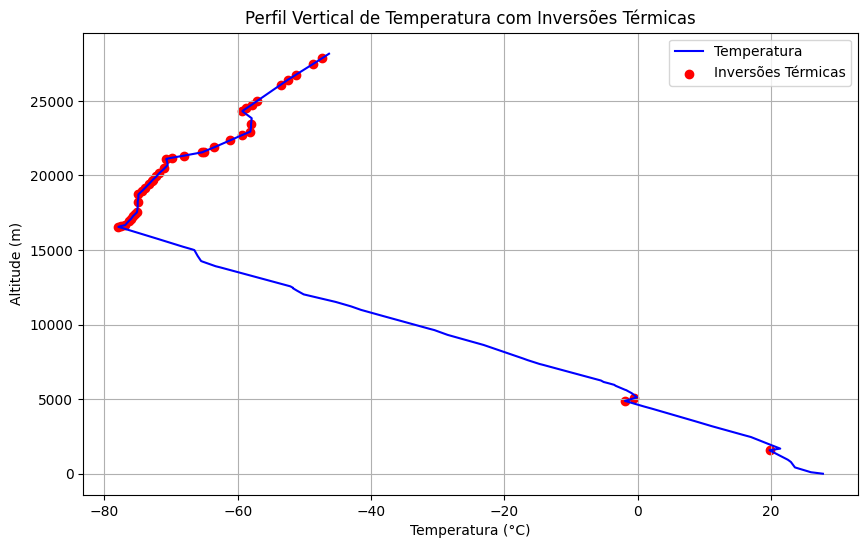

In [11]:
from datetime import datetime
import pandas as pd
from siphon.simplewebservice.wyoming import WyomingUpperAir
import matplotlib.pyplot as plt


# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Calcular gradientes de temperatura
delta_T = np.diff(df['temperature'])
delta_Z = np.diff(df['height'])

# Ajustar o comprimento dos gradientes de temperatura
delta_T_adjusted = delta_T
delta_Z_adjusted = delta_Z

# Verificar se os gradientes de temperatura e altitude têm o mesmo comprimento
if len(delta_T_adjusted) != len(delta_Z_adjusted):
    min_length = min(len(delta_T_adjusted), len(delta_Z_adjusted))
    delta_T_adjusted = delta_T_adjusted[:min_length]
    delta_Z_adjusted = delta_Z_adjusted[:min_length]

# Calcular o gradiente de temperatura vertical (dT/dZ)
dTdZ = (delta_T_adjusted / delta_Z_adjusted) * 100  # em graus Celsius por 100 metros

# Identificar inversões térmicas (onde dT/dZ > 0)
inversoes_termicas = df.iloc[:-1][dTdZ > 0]

# Plotar perfil de temperatura e marcar inversões térmicas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['temperature'], df['height'], label='Temperatura', color='blue')
ax.scatter(inversoes_termicas['temperature'], inversoes_termicas['height'], color='red', marker='o', label='Inversões Térmicas')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Altitude (m)')
ax.set_title('Perfil Vertical de Temperatura com Inversões Térmicas')
ax.legend()
plt.grid(True)

# Diretório onde deseja salvar as figuras
output_dir = r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\figures_ativ02\\perfil_temperatura_inversoes_termicas.png'


plt.show()

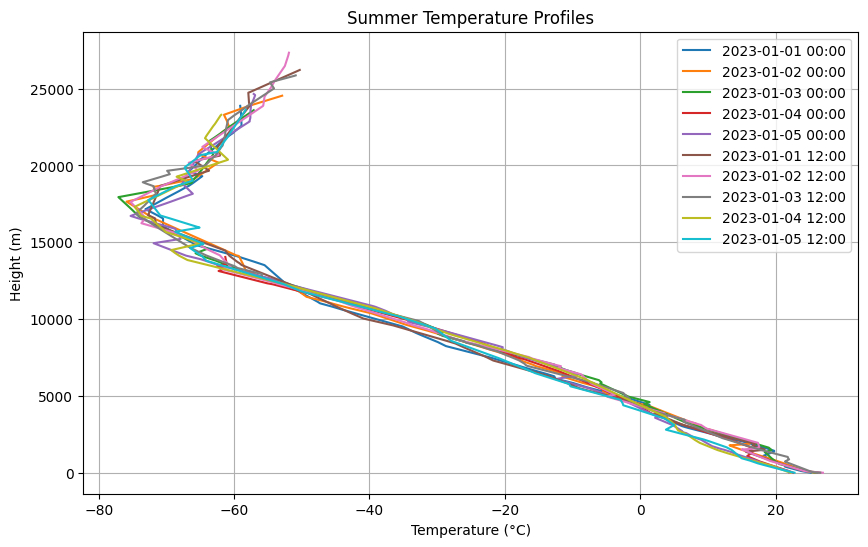

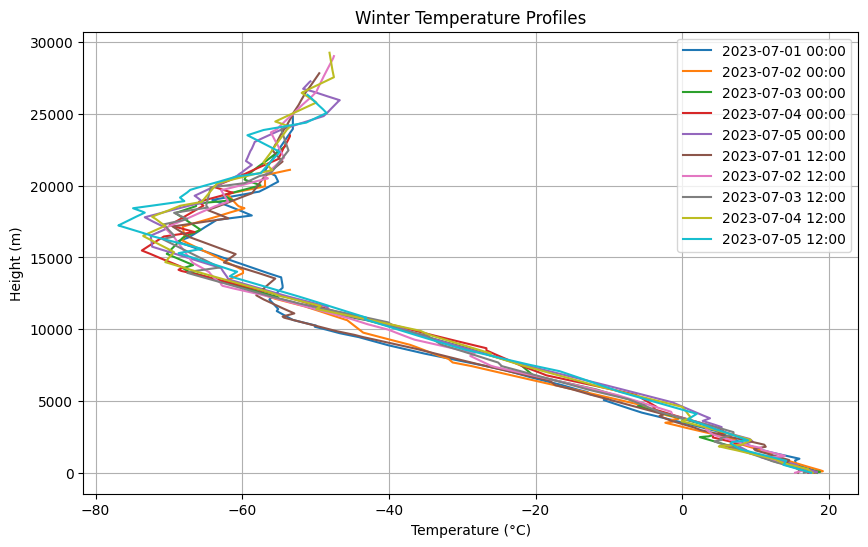

Summer Inversion Points: [17655.0, 19134.0, 18424.0, 13607, 15219, 25569, 23283, 19975, 20113, 15956.0]
Summer Boundary Layer Heights: [10626.0, 8899.0, 10890.0, 11924, 12340, 16108, 8606, 11951, 11887, 13682.0]
Winter Inversion Points: [17924.0, 21064, 18939, 19513.0, 24850, 17519.0, 17762, 20177, 17210, 18924]
Winter Boundary Layer Heights: [8298.0, 6898, 4633, 10820.0, 7530, 8638.0, 12190, 7444, 7520, 13690]


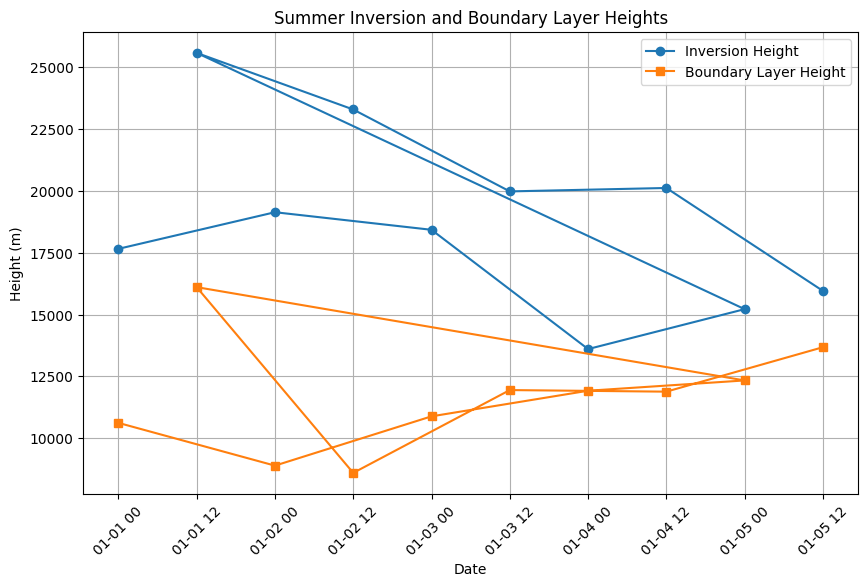

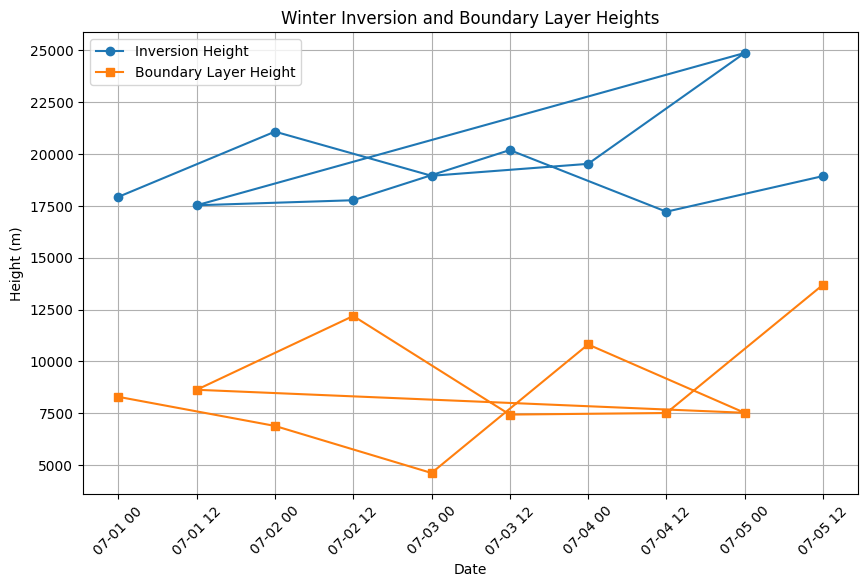

In [13]:
# Coleta e Análise dos Dados

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para obter dados de sondagem
def get_sounding_data(dates, station):
    data = []
    for date in dates:
        df = WyomingUpperAir.request_data(date, station)
        data.append(df)
    return data

# Definindo os períodos de verão e inverno
summer_dates = [datetime(2023, 1, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 1, 1, 12) + timedelta(days=i) for i in range(5)]
winter_dates = [datetime(2023, 7, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 7, 1, 12) + timedelta(days=i) for i in range(5)]

station = 'SBFL'

# Coletando dados de verão
summer_data = get_sounding_data(summer_dates, station)

# Coletando dados de inverno
winter_data = get_sounding_data(winter_dates, station)

# Função para plotar perfis de temperatura
def plot_temperature_profiles(data, dates, title):
    plt.figure(figsize=(10, 6))
    for df, date in zip(data, dates):
        plt.plot(df['temperature'], df['height'], label=date.strftime('%Y-%m-%d %H:%M'))
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Height (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotando os perfis de temperatura para o verão
plot_temperature_profiles(summer_data, summer_dates, 'Summer Temperature Profiles')

# Plotando os perfis de temperatura para o inverno
plot_temperature_profiles(winter_data, winter_dates, 'Winter Temperature Profiles')

# Função para encontrar pontos de inversão e camada limite
def find_inversion_and_boundary_layer(data):
    inversion_points = []
    boundary_layer_heights = []

    for df in data:
        temp = df['temperature']
        height = df['height']
        inversion_idx = temp.diff().idxmax()
        inversion_height = height[inversion_idx]
        inversion_points.append(inversion_height)

        boundary_layer_height = height[temp.diff().idxmin()]
        boundary_layer_heights.append(boundary_layer_height)

    return inversion_points, boundary_layer_heights

# Encontrando inversões e alturas da camada limite para verão
summer_inversion_points, summer_boundary_layers = find_inversion_and_boundary_layer(summer_data)

# Encontrando inversões e alturas da camada limite para inverno
winter_inversion_points, winter_boundary_layers = find_inversion_and_boundary_layer(winter_data)

print('Summer Inversion Points:', summer_inversion_points)
print('Summer Boundary Layer Heights:', summer_boundary_layers)
print('Winter Inversion Points:', winter_inversion_points)
print('Winter Boundary Layer Heights:', winter_boundary_layers)

# Função para plotar inversões e camadas limite
def plot_inversion_and_boundary_layer(dates, inversions, boundary_layers, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, inversions, 'o-', label='Inversion Height')
    plt.plot(dates, boundary_layers, 's-', label='Boundary Layer Height')
    plt.xlabel('Date')
    plt.ylabel('Height (m)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Plotando para o verão
plot_inversion_and_boundary_layer(summer_dates, summer_inversion_points, summer_boundary_layers, 'Summer Inversion and Boundary Layer Heights')

# Plotando para o inverno
plot_inversion_and_boundary_layer(winter_dates, winter_inversion_points, winter_boundary_layers, 'Winter Inversion and Boundary Layer Heights')

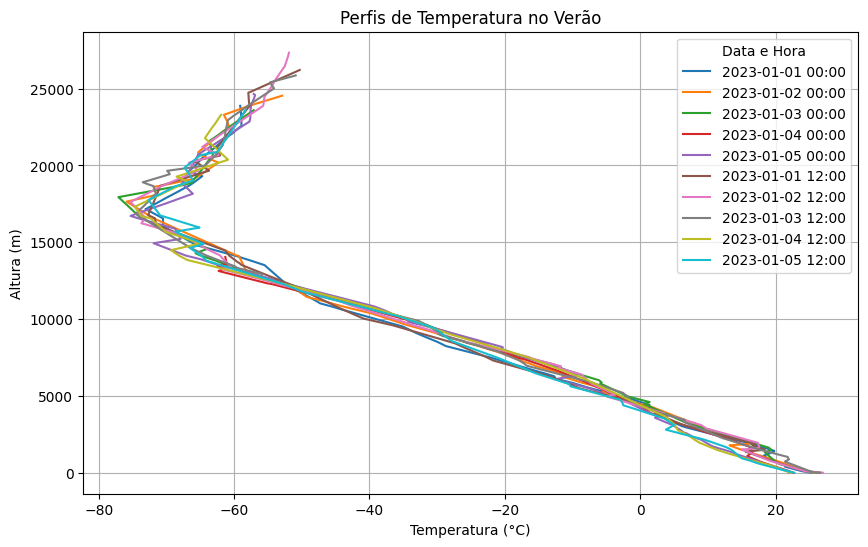

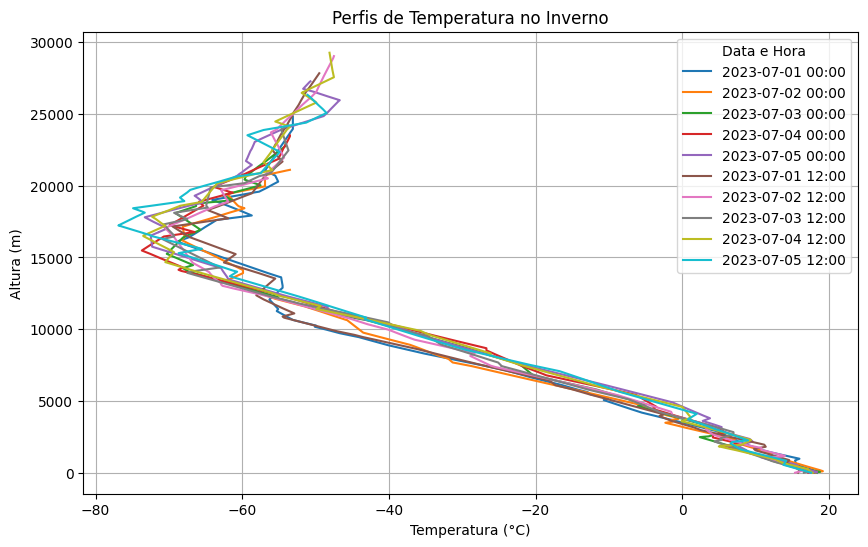

In [14]:
## Análise do Perfil de Temperatura: 
Plot dos perfis de temperatura para cada período (verão e inverno).

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Função para obter dados de sondagem
def get_sounding_data(dates, station):
    data = []
    for date in dates:
        df = WyomingUpperAir.request_data(date, station)
        data.append(df)
    return data

# Definindo os períodos de verão e inverno
summer_dates = [datetime(2023, 1, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 1, 1, 12) + timedelta(days=i) for i in range(5)]
winter_dates = [datetime(2023, 7, 1, 0) + timedelta(days=i) for i in range(5)] + [datetime(2023, 7, 1, 12) + timedelta(days=i) for i in range(5)]

station = 'SBFL'

# Coletando dados de verão
summer_data = get_sounding_data(summer_dates, station)

# Coletando dados de inverno
winter_data = get_sounding_data(winter_dates, station)

# Função para plotar perfis de temperatura
def plot_temperature_profiles(data, dates, title):
    plt.figure(figsize=(10, 6))
    for df, date in zip(data, dates):
        plt.plot(df['temperature'], df['height'], label=date.strftime('%Y-%m-%d %H:%M'))
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Altura (m)')
    plt.title(title)
    plt.legend(title='Data e Hora', loc='upper right')
    plt.grid(True)
    plt.show()

# Plotando os perfis de temperatura para o verão
plot_temperature_profiles(summer_data, summer_dates, 'Perfis de Temperatura no Verão')

# Plotando os perfis de temperatura para o inverno
plot_temperature_profiles(winter_data, winter_dates, 'Perfis de Temperatura no Inverno')


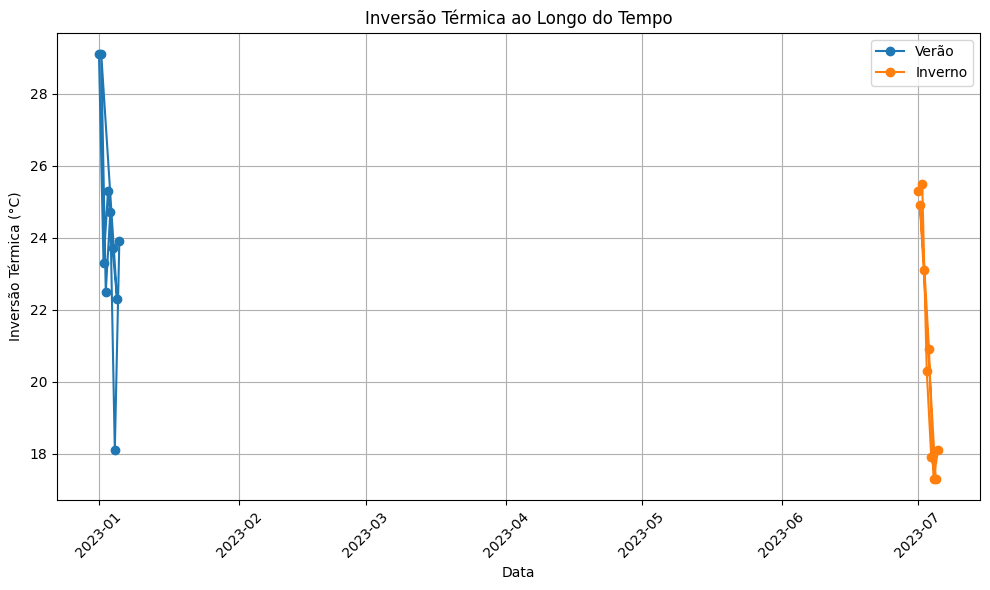

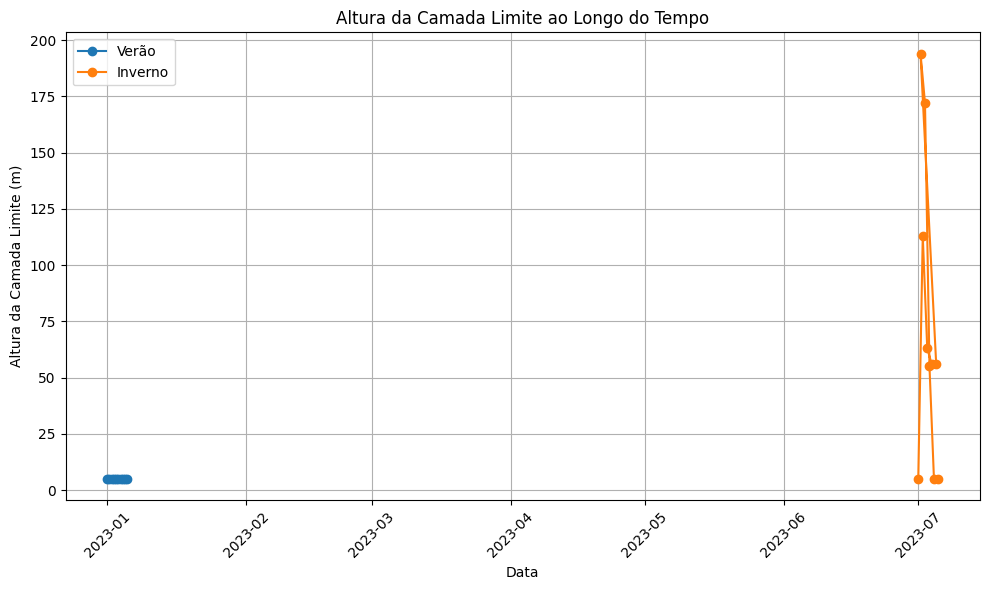

In [15]:
import numpy as np

# Função para calcular a inversão térmica e a altura da camada limite
def calculate_inversion_and_boundary_layer(data):
    inversions = []
    boundary_layer_heights = []
    for df in data:
        # Calculando a inversão térmica como a diferença de temperatura entre 850 hPa e 500 hPa
        inversion = df['temperature'].loc[df['pressure'] == 850].values[0] - df['temperature'].loc[df['pressure'] == 500].values[0]
        inversions.append(inversion)
        
        # Calculando a altura da camada limite como a altura onde a temperatura atinge seu máximo
        boundary_layer_height = df['height'].loc[df['temperature'].idxmax()]
        boundary_layer_heights.append(boundary_layer_height)
    return inversions, boundary_layer_heights

# Calculando inversão e altura da camada limite para o verão e o inverno
summer_inversions, summer_boundary_layer_heights = calculate_inversion_and_boundary_layer(summer_data)
winter_inversions, winter_boundary_layer_heights = calculate_inversion_and_boundary_layer(winter_data)

# Plotando o gráfico de inversão térmica
plt.figure(figsize=(10, 6))
plt.plot(summer_dates, summer_inversions, label='Verão', marker='o')
plt.plot(winter_dates, winter_inversions, label='Inverno', marker='o')
plt.xlabel('Data')
plt.ylabel('Inversão Térmica (°C)')
plt.title('Inversão Térmica ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando o gráfico de altura da camada limite
plt.figure(figsize=(10, 6))
plt.plot(summer_dates, summer_boundary_layer_heights, label='Verão', marker='o')
plt.plot(winter_dates, winter_boundary_layer_heights, label='Inverno', marker='o')
plt.xlabel('Data')
plt.ylabel('Altura da Camada Limite (m)')
plt.title('Altura da Camada Limite ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()